In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_excel("Superstore2017.xls")
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
# filter rows with category as furniture
furniture_sales = data.loc[data["Category"] == "Furniture"]
furniture_sales.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


The goal is to use the order date and the sales to predict future sales of furniture. as of such, only the date and sales column are of importance at this time. I will be working with the "furniture_sales" data frame gotten from filtering the dataset with category = furniture

In [4]:
furniture_sales.shape

(2121, 21)

In [5]:
# minimum date
furniture_sales['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [6]:
# Maximum date
furniture_sales['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

The dataset contains abotu 4 years fo sales data from 2014 to 2017

## Data preprocessing
- drop columns
- sort data using date
- clean the date column

In [7]:
furniture_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
# Select columns to drop & drop them
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit'  ]



In [9]:
furniture_sales.drop(cols, inplace=True, axis=1)

/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
# sorting the data based on Order Date
furniture_sales = furniture_sales.sort_values("Order Date")
furniture_sales.head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [11]:
# checking and removing null values
furniture_sales.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
# reset index and groupby 
'''
this will remove any instace of duplicate dates by summing 
the sales amount and chanign the index from the earliest ot the latest/most recent'''
furniture_sales = furniture_sales.groupby("Order Date")["Sales"].sum().reset_index()
furniture_sales.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [13]:
# create index using order date
furniture_sales =  furniture_sales.set_index("Order Date")
furniture_sales.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [16]:
# upsambling: increase frequency of sampling
# downsampling: decreaing frequency fo sampling

# resampling

y = furniture_sales['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

Our dta now exist in monthly frequency which has significantly reduced the frequency fo the data. Now we can visualise the furniture sales 

## Visualizing furniture sales time series data

<AxesSubplot:xlabel='Order Date'>

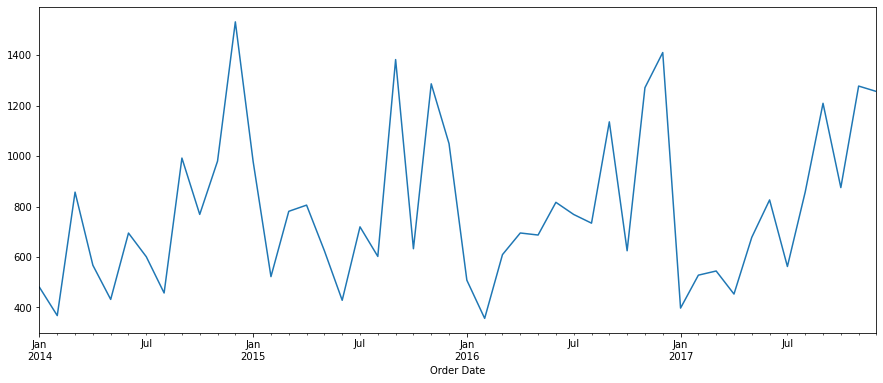

In [19]:
y.plot(figsize=(15, 6))

In [23]:
print(plt.rcParams.get('figure.figsize'))

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]
[18.0, 8.0]


#### decomposing frame componets fo the dataset
#### systematic: whcih are modelled - level, trend and seasonality
#### unsystematic: cannot be modelled - Noise

- level = Average value fo series
- trend = decreasing for increasing value fo teh series
- seasonality = repeatign short-term cycles in the series
- Noise =  Random variation in the series


## combinign the above through:
- Addition -> y(t) =level+trend+seasonlity+noise


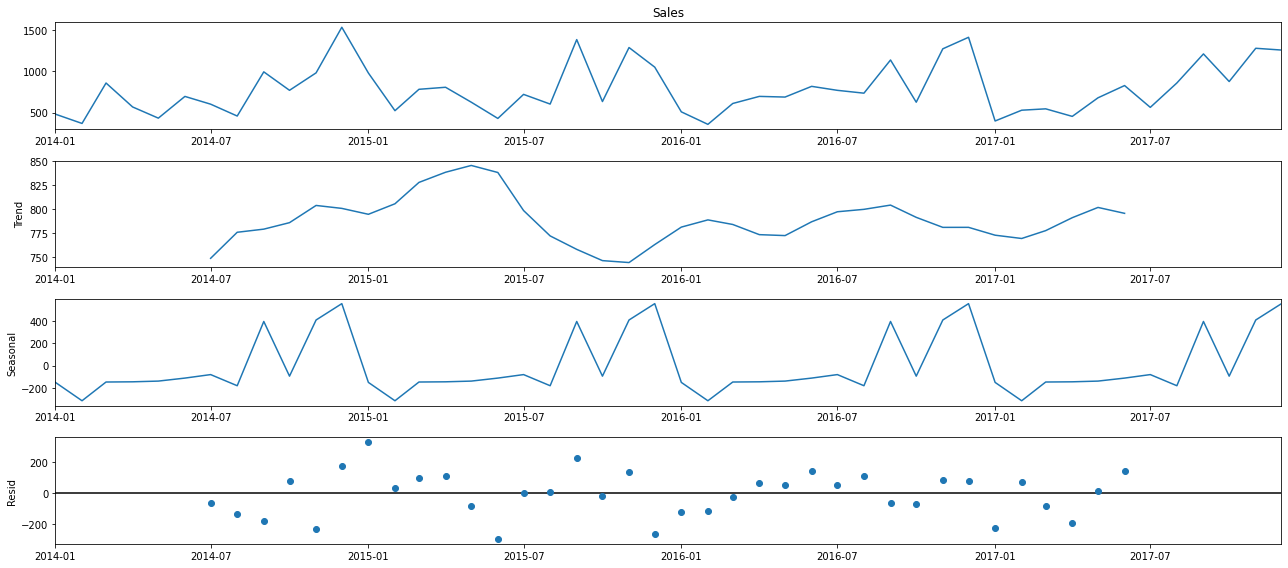

In [25]:
# Decompstion of the mdoel usign stat method
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig=decomposition.plot()
plt.show()

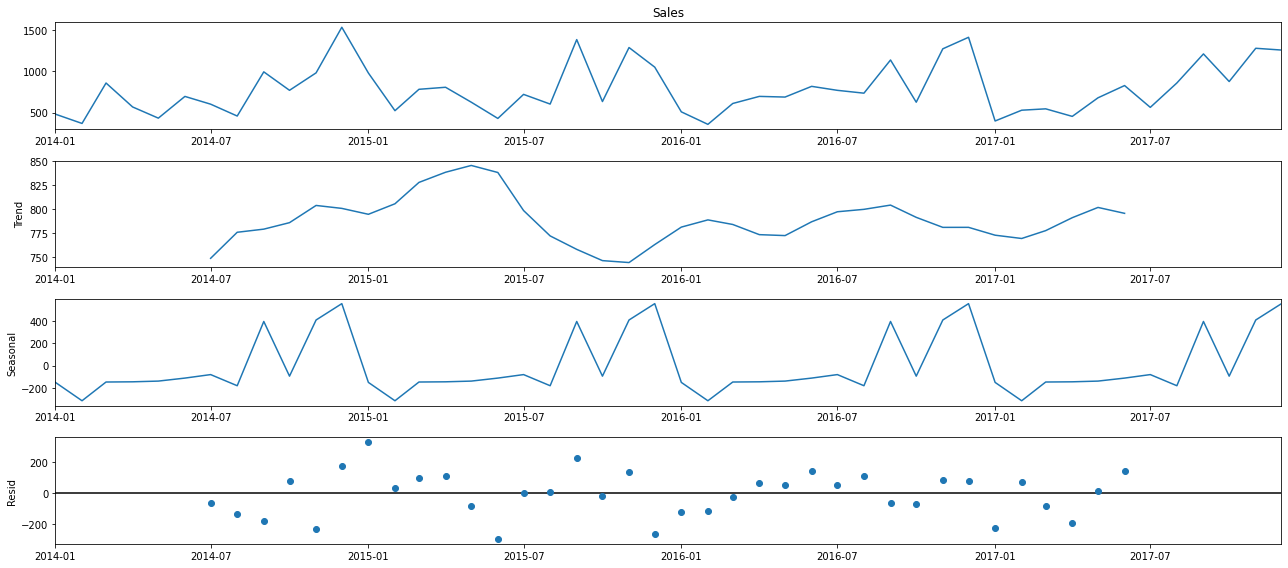

In [26]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='Multiplicative')
fig=decomposition.plot()
plt.show()

## Time series forecasting with ARIMA
- ARIMA - Autoregressive integrated moving average
- SARIMAX - Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors
- ARIMA componets(p,d,q)
- ARIMA(P,D,Q)

- P autoregressive componet- incorporates effects of past values on our models
- D integretive part - Differences in the values and their effects
- Q  moving average -  Error of the model


In [28]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq=[(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [31]:
print("Examples of prameter combination for ARIMA")
print('SARIMAX:{} x{}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2], seasonal_pdq[4]))

Examples of prameter combination for ARIMA
SARIMAX:(0, 0, 1) x(0, 0, 1, 12)
SARIMAX:(0, 0, 1) x(0, 1, 0, 12)
SARIMAX:(0, 1, 0) x(0, 1, 1, 12)
SARIMAX:(0, 1, 0) x(1, 0, 0, 12)


In [34]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal, 
                                            enforce_stationarity= False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print("ARIMA{}*{}12 - AIC:{}".format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)*(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)*(0, 0, 1, 12)12 - AIC:1590.26306047436
ARIMA(0, 0, 0)*(0, 1, 0, 12)12 - AIC:477.71701309202774


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)*(0, 1, 1, 12)12 - AIC:302.2702899793669
ARIMA(0, 0, 0)*(1, 0, 0, 12)12 - AIC:497.2314433418337
ARIMA(0, 0, 0)*(1, 0, 1, 12)12 - AIC:1414.1027748265667
ARIMA(0, 0, 0)*(1, 1, 0, 12)12 - AIC:318.0047199116341


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)*(1, 1, 1, 12)12 - AIC:304.248828030213
ARIMA(0, 0, 1)*(0, 0, 0, 12)12 - AIC:720.9252270758095


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)*(0, 0, 1, 12)12 - AIC:2705.77265189589
ARIMA(0, 0, 1)*(0, 1, 0, 12)12 - AIC:466.5607429809162
ARIMA(0, 0, 1)*(0, 1, 1, 12)12 - AIC:291.62613896733006


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)*(1, 0, 0, 12)12 - AIC:499.5817476995887


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)*(1, 0, 1, 12)12 - AIC:2554.1478682756688
ARIMA(0, 0, 1)*(1, 1, 0, 12)12 - AIC:319.9884876946866
ARIMA(0, 0, 1)*(1, 1, 1, 12)12 - AIC:291.8725576435603
ARIMA(0, 1, 0)*(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)*(0, 0, 1, 12)12 - AIC:1369.9009798274033
ARIMA(0, 1, 0)*(0, 1, 0, 12)12 - AIC:486.6378567198382


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)*(0, 1, 1, 12)12 - AIC:304.96712281679663
ARIMA(0, 1, 0)*(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)*(1, 0, 1, 12)12 - AIC:1321.1187970800001
ARIMA(0, 1, 0)*(1, 1, 0, 12)12 - AIC:319.7714068109211


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)*(1, 1, 1, 12)12 - AIC:306.9113200151421
ARIMA(0, 1, 1)*(0, 0, 0, 12)12 - AIC:649.9056176816888


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)*(0, 0, 1, 12)12 - AIC:2255.311820036244
ARIMA(0, 1, 1)*(0, 1, 0, 12)12 - AIC:458.8705548482537
ARIMA(0, 1, 1)*(0, 1, 1, 12)12 - AIC:279.58062333599605
ARIMA(0, 1, 1)*(1, 0, 0, 12)12 - AIC:486.1832977442641


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)*(1, 0, 1, 12)12 - AIC:1477.0058248065711
ARIMA(0, 1, 1)*(1, 1, 0, 12)12 - AIC:310.75743684172403


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)*(1, 1, 1, 12)12 - AIC:281.55766214612396
ARIMA(1, 0, 0)*(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)*(0, 0, 1, 12)12 - AIC:1487.5690948748645
ARIMA(1, 0, 0)*(0, 1, 0, 12)12 - AIC:479.46321478521355


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)*(0, 1, 1, 12)12 - AIC:304.20776751609714
ARIMA(1, 0, 0)*(1, 0, 0, 12)12 - AIC:480.9259367935197


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)*(1, 0, 1, 12)12 - AIC:1395.9327193988659
ARIMA(1, 0, 0)*(1, 1, 0, 12)12 - AIC:304.4664675084599
ARIMA(1, 0, 0)*(1, 1, 1, 12)12 - AIC:304.58426921438075
ARIMA(1, 0, 1)*(0, 0, 0, 12)12 - AIC:665.779444218626


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)*(0, 0, 1, 12)12 - AIC:2497.2164542891837
ARIMA(1, 0, 1)*(0, 1, 0, 12)12 - AIC:468.3685195814191
ARIMA(1, 0, 1)*(0, 1, 1, 12)12 - AIC:293.34221939659176
ARIMA(1, 0, 1)*(1, 0, 0, 12)12 - AIC:482.576332387679


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)*(1, 0, 1, 12)12 - AIC:2547.006796468095
ARIMA(1, 0, 1)*(1, 1, 0, 12)12 - AIC:306.01560021316396


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)*(1, 1, 1, 12)12 - AIC:293.75131881236365
ARIMA(1, 1, 0)*(0, 0, 0, 12)12 - AIC:671.2513547541902


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)*(0, 0, 1, 12)12 - AIC:nan
ARIMA(1, 1, 0)*(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)*(0, 1, 1, 12)12 - AIC:300.2130611619099
ARIMA(1, 1, 0)*(1, 0, 0, 12)12 - AIC:475.3403658786717
ARIMA(1, 1, 0)*(1, 0, 1, 12)12 - AIC:325958894355177.1
ARIMA(1, 1, 0)*(1, 1, 0, 12)12 - AIC:300.62709013454264
ARIMA(1, 1, 0)*(1, 1, 1, 12)12 - AIC:302.3264992507484


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)*(0, 0, 0, 12)12 - AIC:649.0318019835265


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)*(0, 0, 1, 12)12 - AIC:309.5702646310217
ARIMA(1, 1, 1)*(0, 1, 0, 12)12 - AIC:460.4762687609924
ARIMA(1, 1, 1)*(0, 1, 1, 12)12 - AIC:281.38730069394046
ARIMA(1, 1, 1)*(1, 0, 0, 12)12 - AIC:469.52503546608364


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)*(1, 0, 1, 12)12 - AIC:2344.439880510096
ARIMA(1, 1, 1)*(1, 1, 0, 12)12 - AIC:297.7875439534141


/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)*(1, 1, 1, 12)12 - AIC:283.3661017139785


In [39]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), 
                                seasonal_order = (1,1,0,12), 
                                enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0676      0.226      0.299      0.765      -0.376       0.511
ma.L1         -1.0000      0.279     -3.590      0.000      -1.546      -0.454
ar.S.L12      -0.4807      0.147     -3.260      0.001      -0.770      -0.192
sigma2      4.108e+04   6.78e-06   6.06e+09      0.000    4.11e+04    4.11e+04


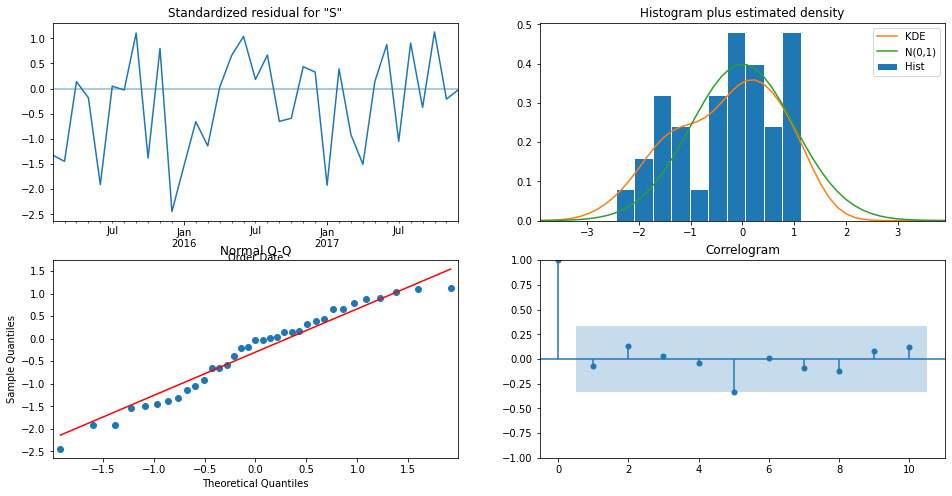

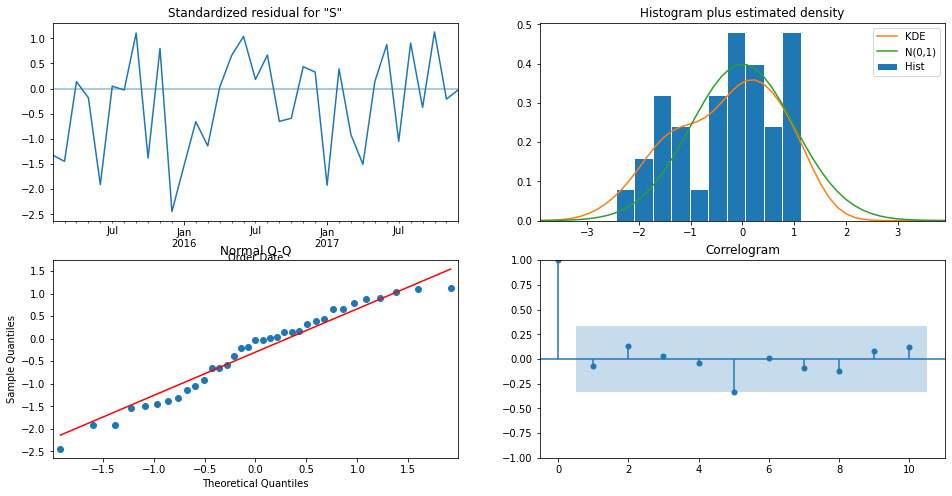

In [40]:
results.plot_diagnostics(figsize=(16,8))

## Validate forecasts

In [51]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

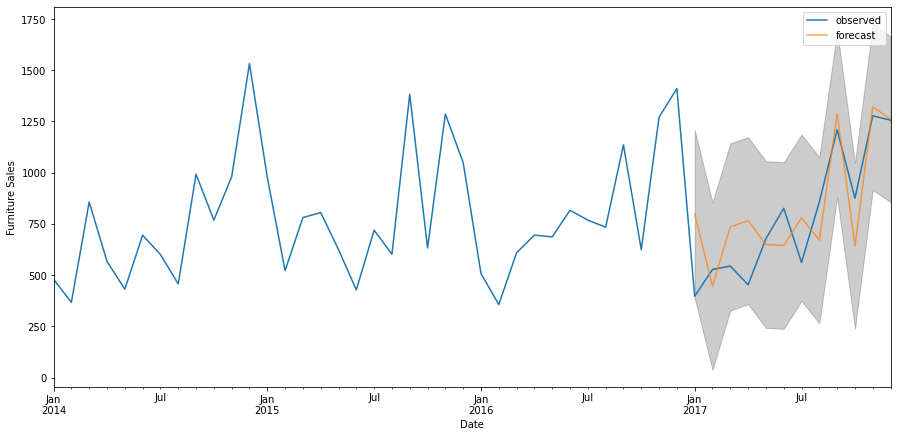

In [56]:
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label="forecast", alpha=0.7, figsize = (15,7))

ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

In [54]:
y_forecasted = pred.predicted_mean
y_true = y['2016-01-01':]

# mean squared Error
mse = ((y_forecasted - y_true)**2).mean()

print("MSE is {}".format(round(mse, 3)))

MSE is 39996.011


In [55]:
print("RMSE {}".format(round(np.sqrt(mse),3)))

RMSE 199.99


## Producing visualization of Forecasts

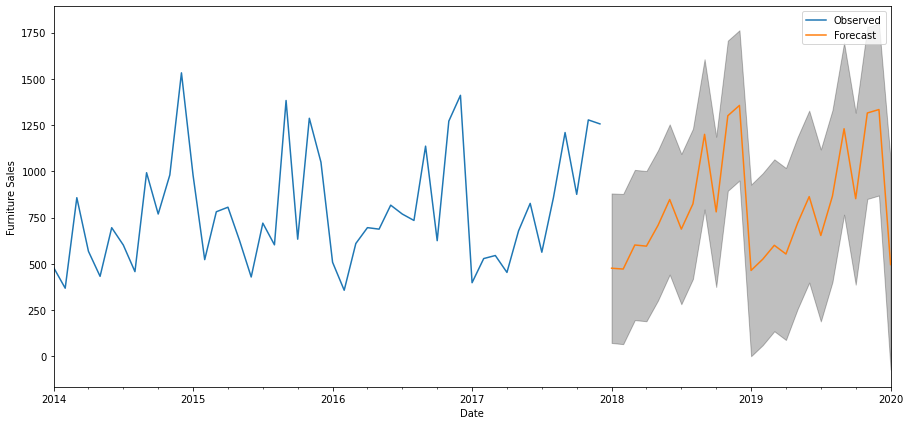

In [58]:
# Number of steps for forecast from the end fo the sample
pred_uc = results.get_forecast(steps=25)

# confidence interval of the fitted parameters
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'Observed', figsize = (15, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# fill the area between two horizontal curves
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
                color='k',
                alpha=0.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

## Time series comparison

### Data preprocessing

In [62]:
furniture = data.loc[data['Category'] == 'Furniture']
office = data.loc[data['Category'] == 'Office Supplies']

In [63]:
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [64]:
# Select columns to drop & drop them
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit'  ]

furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

/home/lph4/.environment/generalLearning/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

In [70]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()


In [71]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [69]:

office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


## Data Exploration

In [72]:
# set index usign existing column
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

# resample
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales':y_office.values})

'''
    merge:
    how - type of merge to be perfomed.
    on - column or index level names to join on. These must be found in both Dataframes.
    if on is none and not merging on indexes then
    column - or index level names to join on. These must  be found in both dataframes 
'''
store = furniture.merge(office, how='inner', on = 'Order Date')

# rename clumns
store.rename(columns = {'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


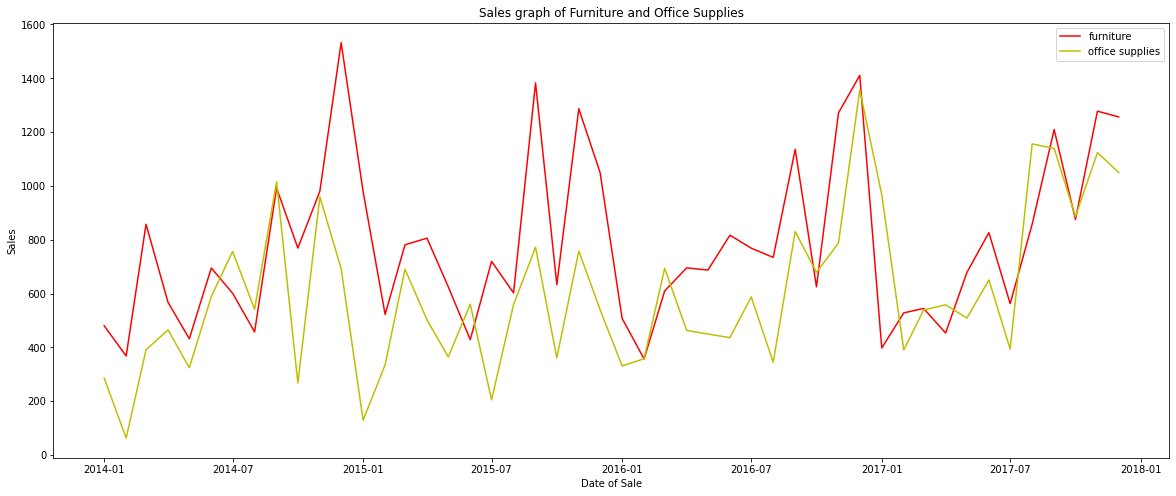

In [73]:
plt.figure(figsize=(20, 8))
# Plot blue line
plt.plot(store['Order Date'], store['furniture_sales'], 'r-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'y-', label = 'office supplies')
plt.xlabel('Date of Sale')
plt.ylabel('Sales')
plt.title('Sales graph of Furniture and Office Supplies')
plt.legend()

In [76]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

office supplies first time produced higher sales than furniture is 2014-07-01.


## Using prophet